In [1]:
import cv2
import numpy as np
def show_img(img):
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyWindow('image')

### I/O

In [2]:
img = cv2.imread('data/baboon.jpg')

In [3]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyWindow('image')

In [35]:
cv2.imwrite('new.png', img)

True

In [41]:
import numpy as np
import cv2

cap = cv2.VideoCapture('data/768x576.avi')

while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

error: C:\ci\opencv_1512688052760\work\modules\imgproc\src\color.cpp:11048: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor


In [37]:
img = cv2.imread('data/baboon.jpg')
img[100:300,100:150]=[255,255,255]
show_img(img)

### split

In [15]:
b,g,r = cv2.split(img)

In [18]:
show_img(b)

In [17]:
show_img(g)

In [19]:
show_img(r)

In [20]:
img2= cv2.merge((b,g,r))

In [21]:
show_img(img2)

### addWeighted

In [39]:
img1 = cv2.imread('data/baboon.jpg')
img2 = cv2.imread('data/opencv-logo.png')
x, y, _ = img1.shape
img2 = img2[0:x, 0:y]
dst = cv2.addWeighted(img1,0.6,img2,0.4,0)

cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

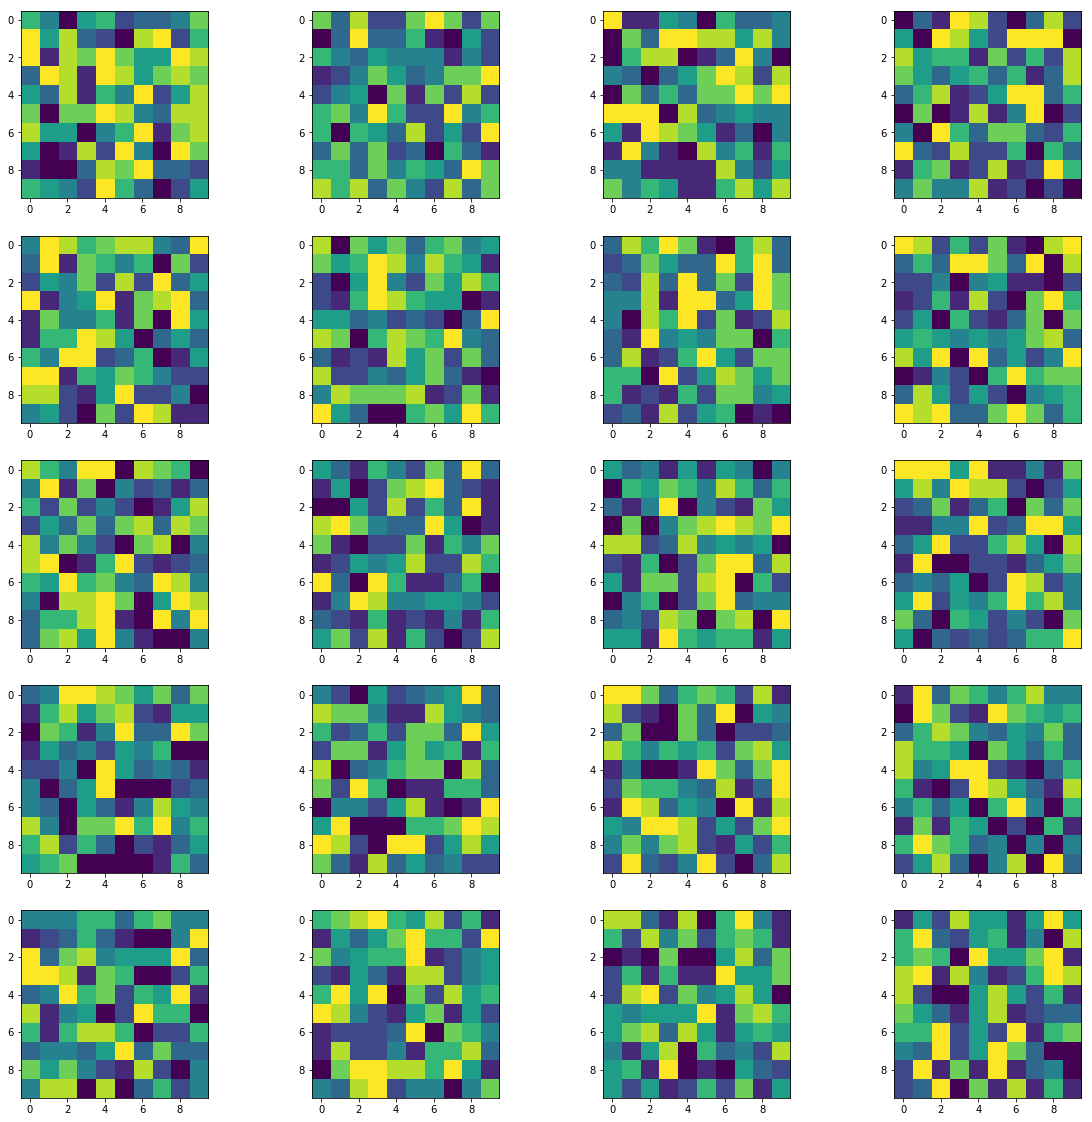

In [12]:
import matplotlib.pyplot as plt
import numpy as np
w=10
h=10
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

### cvtColor

In [4]:
bgr = cv2.imread('data/starry_night.jpg')

In [5]:
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
HSV = gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)

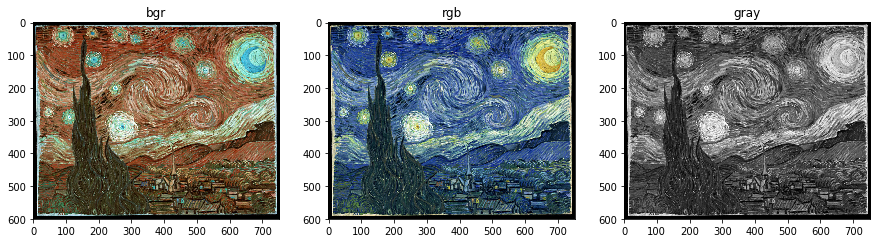

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
bgr = cv2.imread('data/starry_night.jpg')
rgb =  cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
im_list = [bgr, rgb, gray]
title_list = ['bgr', 'rgb', 'gray']
fig = plt.figure(figsize=(15, 15))
for i in range(1, 4):
    fig.add_subplot(1, 3, i)
    plt.imshow(im_list[i-1], cmap='gray')
    plt.title(title_list[i-1])
plt.show()

### bitwise_and

In [27]:
import cv2
import numpy as np

cap = cv2.VideoCapture('data/Megamind.avi')

while(1):

    # Take each frame
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([80,0,0])
    upper_blue = np.array([120,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

#   cv2.imshow('frame',frame)
#   cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

error: C:\ci\opencv_1512688052760\work\modules\imgproc\src\color.cpp:11115: error: (-215) (scn == 3 || scn == 4) && (depth == 0 || depth == 5) in function cv::cvtColor


In [19]:

cv2.destroyAllWindows()

### threshold

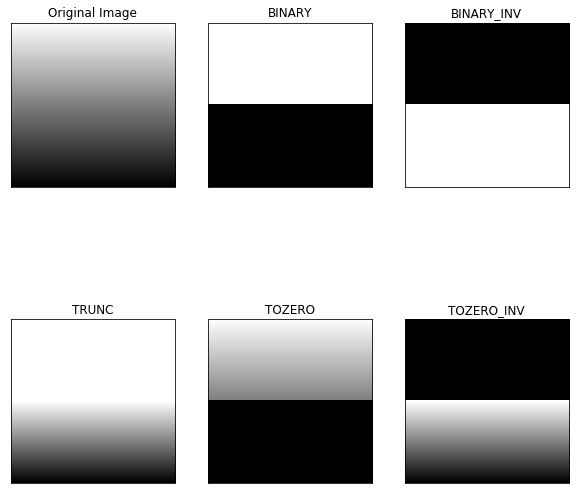

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('data/linear_gradient.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
fig = plt.figure(figsize=(10,10))
for i in range(6):
    fig.add_subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

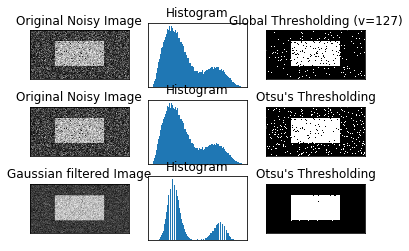

In [106]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/noisy2.png',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [28]:
img = cv2.imread('noisy2.png',0)
blur = cv2.GaussianBlur(img,(5,5),0)

# find normalized_histogram, and its cumulative distribution function
hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()

bins = np.arange(256)

fn_min = np.inf
thresh = -1

for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights

    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2

    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i

# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(thresh,ret)

error: C:\ci\opencv_1512688052760\work\modules\core\src\matrix.cpp:991: error: (-215) dims <= 2 && step[0] > 0 in function cv::Mat::locateROI


### adaptiveThreshold

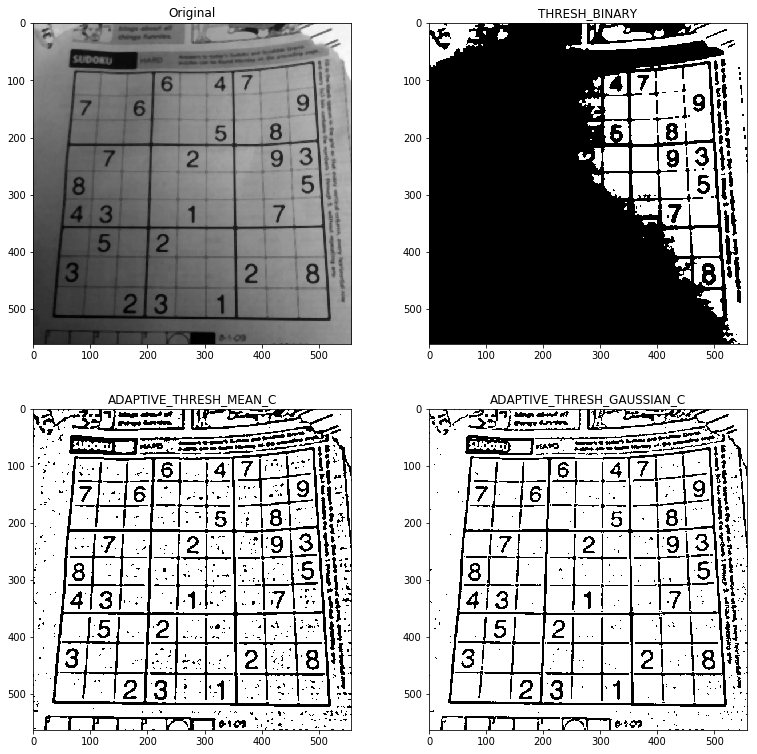

In [47]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/sudokubig.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

f = plt.figure(figsize=(13,13))
ax = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)
tmp = images[0].copy()
ax.imshow(tmp,cmap='gray')
ax.title.set_text('Original')
ax2.imshow(images[1],cmap='gray')
ax2.title.set_text('THRESH_BINARY')
ax3.imshow(images[2],cmap='gray')
ax3.title.set_text('ADAPTIVE_THRESH_MEAN_C')
ax4.imshow(images[3],cmap='gray')
ax4.title.set_text('ADAPTIVE_THRESH_GAUSSIAN_C')
plt.show()

### blur

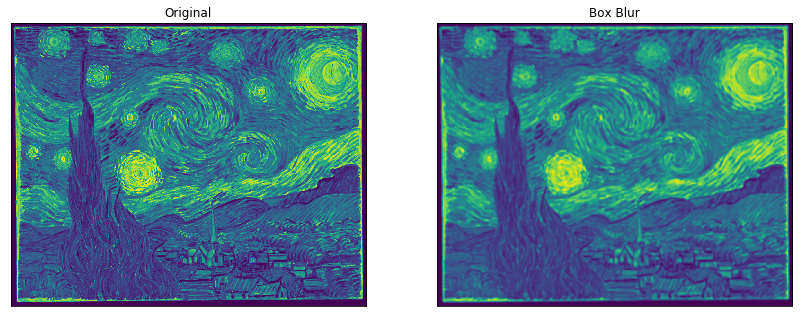

In [58]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/starry_night.jpg')
img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

blur = cv2.blur(img,(5,5))
fig = plt.figure(figsize=(14,14))
fig.add_subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
fig.add_subplot(122),plt.imshow(blur),plt.title('Box Blur')
plt.xticks([]), plt.yticks([])
plt.show()

### GaussianBlur

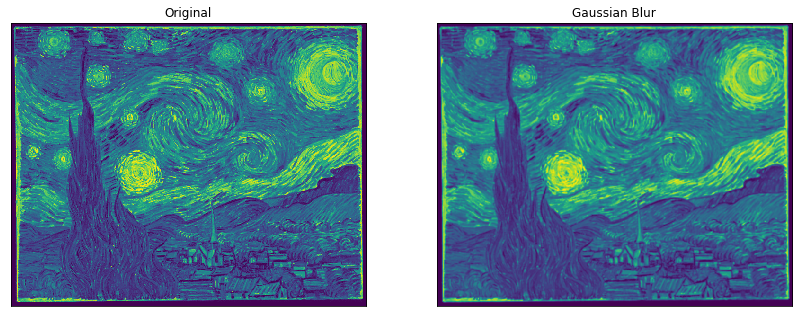

In [57]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/starry_night.jpg')
img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(img,(5,5),0)

fig = plt.figure(figsize=(14,14))
fig.add_subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
fig.add_subplot(122),plt.imshow(blur),plt.title('Gaussian Blur')
plt.xticks([]), plt.yticks([])
plt.show()

### medianBlur

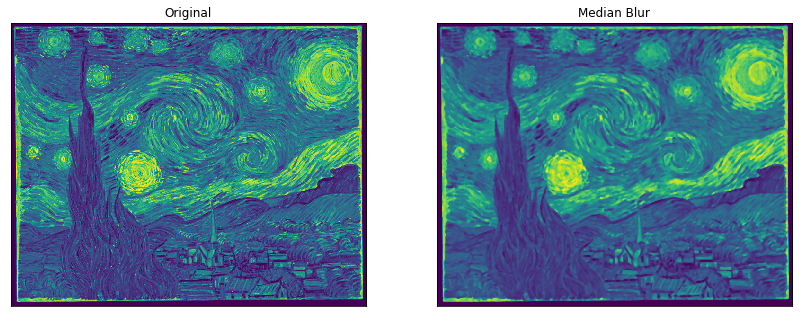

In [56]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/starry_night.jpg')
img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(img,5)
fig = plt.figure(figsize=(14,14))
fig.add_subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
fig.add_subplot(122),plt.imshow(blur),plt.title('Median Blur')
plt.xticks([]), plt.yticks([])
plt.show()

### bilateralFilter

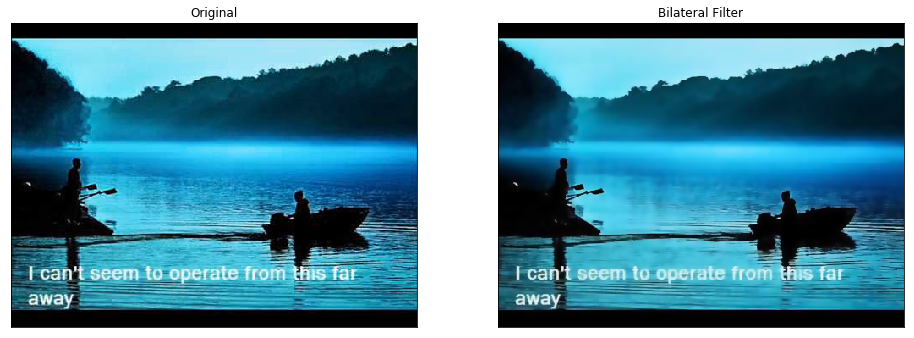

In [62]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('data/hqdefault.jpg')
blur = cv2.bilateralFilter(img,9,75,75)
fig = plt.figure(figsize=(16,16))
fig.add_subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
fig.add_subplot(122),plt.imshow(blur),plt.title('Bilateral Filter')
plt.xticks([]), plt.yticks([])
plt.show()

### morphologyEx

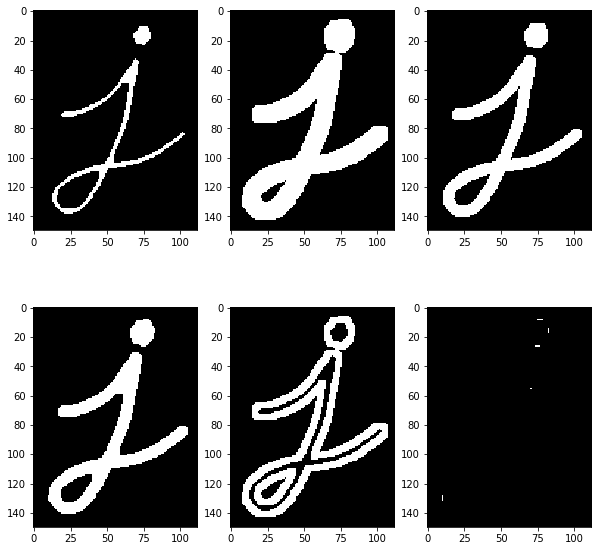

In [63]:
import cv2
import numpy as np

img = cv2.imread('data/j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(231)
ax2 = f.add_subplot(232)
ax3 = f.add_subplot(233)
ax4 = f.add_subplot(234)
ax5 = f.add_subplot(235)
ax6 = f.add_subplot(236)
ax.imshow(erosion,cmap='gray')
ax2.imshow(dilation,cmap='gray')
ax3.imshow(opening,cmap='gray')
ax4.imshow(closing,cmap='gray')
ax5.imshow(gradient,cmap='gray')
ax6.imshow(tophat,cmap='gray')
plt.show()

### Laplacian

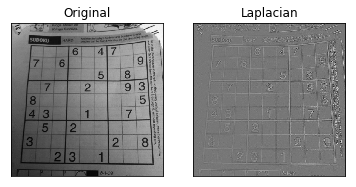

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/sudokubig.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])


plt.show()

### Sobel

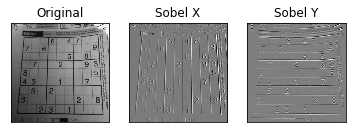

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/sudokubig.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

### Canny

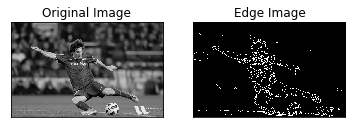

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/messi5.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [36]:
show_img(edges)

### matchTemplate

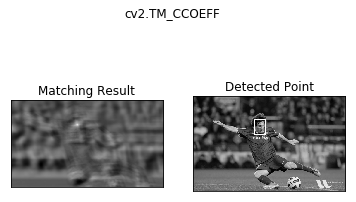

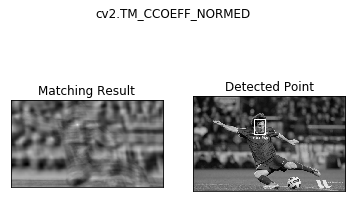

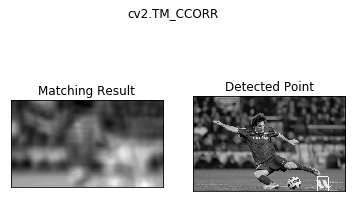

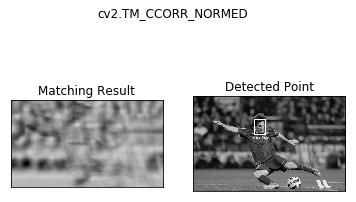

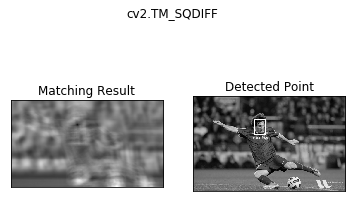

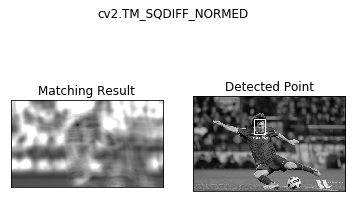

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/messi5.jpg',0)
img2 = img.copy()
template = cv2.imread('data/messi_face.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

### calcHist

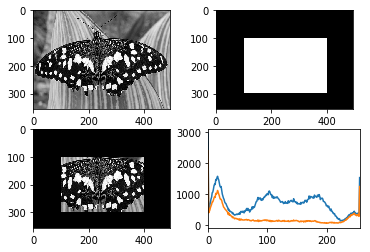

In [37]:
img = cv2.imread('data/butterfly.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

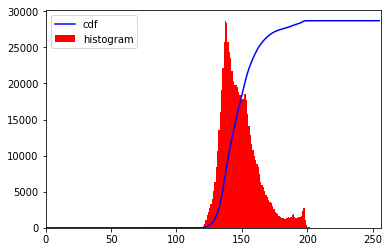

In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/wiki.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [40]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]

In [41]:
show_img(img2)

In [42]:
show_img(img)

### equalizeHist

In [37]:
img = cv2.imread('data/wiki.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
show_img(res)

### calcBackProject

In [51]:
##hsitogram backprojection
import cv2
import numpy as np

roi = cv2.imread('data/rose_red.jpg')
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)

target = cv2.imread('data/messi5.jpg')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)

# calculating object histogram
roihist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )

# normalize histogram and apply backprojection
cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)

# Now convolute with circular disc
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(dst,-1,disc,dst)

# threshold and binary AND
ret,thresh = cv2.threshold(dst,50,255,0)
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(target,thresh)

res = np.vstack((target,thresh,res))
show_img(res)

### dft(discrete fourier transform)

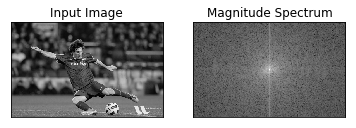

In [22]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('data/messi5.jpg',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

### cornerHarris

In [57]:
import cv2
import numpy as np

filename = 'data/chessboard.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

### Shi-Tomasi Corner Detector

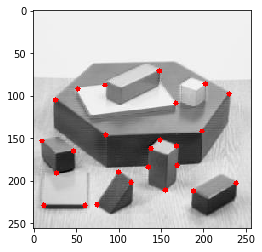

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('data/blox.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img)
plt.show()

### meanShift

In [15]:
import numpy as np
import cv2

cap = cv2.VideoCapture('data/slow.flv')

# take first frame of the video
ret,frame = cap.read()

# setup initial location of window
r,h,c,w = 160,90,300,125  # simply hardcoded the values
track_window = (c,r,w,h)

# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi =  cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while(1):
    ret ,frame = cap.read()

    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)

        # Draw it on image
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        cv2.imshow('img2',img2)

        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)

    else:
        break

cv2.destroyAllWindows()
cap.release()

### CamShift

In [18]:
import numpy as np
import cv2

cap = cv2.VideoCapture('data/slow.flv')

# take first frame of the video
ret,frame = cap.read()

# setup initial location of window
r,h,c,w = 150,100,300,125  # simply hardcoded the values
track_window = (c,r,w,h)

# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi =  cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while(1):
    ret ,frame = cap.read()

    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # apply meanshift to get the new location
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)

        # Draw it on image
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv2.polylines(frame,[pts],True, 255,2)
        cv2.imshow('img2',img2)

        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)

    else:
        break

cv2.destroyAllWindows()
cap.release()

In [1]:
import cv2

In [14]:
help(cv2.calcBackProject)

Help on built-in function calcBackProject:

calcBackProject(...)
    calcBackProject(images, channels, hist, ranges, scale[, dst]) -> dst
    .   @overload



In [13]:
help(cv2.createCLAHE)

Help on built-in function createCLAHE:

createCLAHE(...)
    createCLAHE([, clipLimit[, tileGridSize]]) -> retval
    .



In [17]:
help(cv2.idft)

Help on built-in function idft:

idft(...)
    idft(src[, dst[, flags[, nonzeroRows]]]) -> dst
    .   @brief Calculates the inverse Discrete Fourier Transform of a 1D or 2D array.
    .   
    .   idft(src, dst, flags) is equivalent to dft(src, dst, flags | DFT_INVERSE) .
    .   @note None of dft and idft scales the result by default. So, you should pass DFT_SCALE to one of
    .   dft or idft explicitly to make these transforms mutually inverse.
    .   @sa dft, dct, idct, mulSpectrums, getOptimalDFTSize
    .   @param src input floating-point real or complex array.
    .   @param dst output array whose size and type depend on the flags.
    .   @param flags operation flags (see dft and cv::DftFlags).
    .   @param nonzeroRows number of dst rows to process; the rest of the rows have undefined content (see
    .   the convolution sample in dft description.



In [24]:
help(cv2.Meanshift)

AttributeError: module 'cv2' has no attribute 'Meanshift'

In [17]:
help(cv2.contourArea)

Help on built-in function contourArea:

contourArea(...)
    contourArea(contour[, oriented]) -> retval
    .   @brief Calculates a contour area.
    .   
    .   The function computes a contour area. Similarly to moments , the area is computed using the Green
    .   formula. Thus, the returned area and the number of non-zero pixels, if you draw the contour using
    .   #drawContours or #fillPoly , can be different. Also, the function will most certainly give a wrong
    .   results for contours with self-intersections.
    .   
    .   Example:
    .   @code
    .   vector<Point> contour;
    .   contour.push_back(Point2f(0, 0));
    .   contour.push_back(Point2f(10, 0));
    .   contour.push_back(Point2f(10, 10));
    .   contour.push_back(Point2f(5, 4));
    .   
    .   double area0 = contourArea(contour);
    .   vector<Point> approx;
    .   approxPolyDP(contour, approx, 5, true);
    .   double area1 = contourArea(approx);
    .   
    .   cout << "area0 =" << area0 << endl <<

In [20]:
help(cv2.equalizeHist)

Help on built-in function equalizeHist:

equalizeHist(...)
    equalizeHist(src[, dst]) -> dst
    .   @brief Equalizes the histogram of a grayscale image.
    .   
    .   The function equalizes the histogram of the input image using the following algorithm:
    .   
    .   - Calculate the histogram \f$H\f$ for src .
    .   - Normalize the histogram so that the sum of histogram bins is 255.
    .   - Compute the integral of the histogram:
    .   \f[H'_i =  \sum _{0  \le j < i} H(j)\f]
    .   - Transform the image using \f$H'\f$ as a look-up table: \f$\texttt{dst}(x,y) = H'(\texttt{src}(x,y))\f$
    .   
    .   The algorithm normalizes the brightness and increases the contrast of the image.
    .   
    .   @param src Source 8-bit single channel image.
    .   @param dst Destination image of the same size and type as src .



In [5]:
import cv2
import numpy as np

img = cv2.imread('Star.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(img,127,255,0)
contours = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)
print(M)

{'m00': 48272010.0, 'm10': 13164317625.0, 'm01': 11707545210.0, 'm20': 5141380583745.0, 'm11': 3192178427115.0, 'm02': 4155514291380.0, 'm30': 2249168224227195.0, 'm21': 1261243570679505.0, 'm12': 1133182962893985.0, 'm03': 1680057377015100.0, 'mu20': 1551323767550.9854, 'mu11': -600240139.3227539, 'mu02': 1316050700694.7568, 'mu30': 929448465987.5, 'mu21': 14617583439277.375, 'mu12': 218842489279.1875, 'mu03': 33838013222199.0, 'nu20': 0.0006657507750284754, 'nu11': -2.575931255073677e-07, 'nu02': 0.0005647833110605048, 'nu30': 5.740990893416118e-08, 'nu21': 9.028947432763883e-07, 'nu12': 1.3517400738399052e-08, 'nu03': 2.0900967925482733e-06}


In [2]:
cv2.imshow('',img)
cv2.waitKey(0)
cv2.destroyAllWindows()